In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thyroid-disease-data-set/hypothyroid.csv


In [2]:
df = pd.read_csv('/kaggle/input/thyroid-disease-data-set/hypothyroid.csv')

In [3]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [6]:
df.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [7]:
df['sex'].value_counts()

sex
F    2480
M    1142
?     150
Name: count, dtype: int64

In [8]:
df=df.replace({"F":1,"M":0})

In [9]:
df['TBG'].value_counts()

TBG
?    3772
Name: count, dtype: int64

In [10]:
del df['TBG']

In [11]:
df['referral source'].value_counts()

referral source
other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: count, dtype: int64

In [12]:
del df['referral source']

In [13]:
df['pregnant'].value_counts()

pregnant
f    3719
t      53
Name: count, dtype: int64

In [14]:
df=df.replace({'t':1,'f':0})

In [15]:
df['binaryClass'].value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [16]:
df['binaryClass']=df['binaryClass'].map({'P':1,'N':0})

#positive cases have been denoted by 1 and negative cases have been denoted by 0/

In [17]:
df=df.replace({'?':np.NAN}) #null values have been denoted by ? in our dataset

In [18]:
df.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
TBG measured                   0
binaryClass                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [20]:
df['TSH'].isna().sum()

369

In [21]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41,1.0,0,0,0,0,0,0,0,0,...,1,2.5,1,125,1,1.14,1,109,0,1
1,23,1.0,0,0,0,0,0,0,0,0,...,1,2,1,102,0,NaN,0,NaN,0,1
2,46,0.0,0,0,0,0,0,0,0,0,...,0,NaN,1,109,1,0.91,1,120,0,1
3,70,1.0,1,0,0,0,0,0,0,0,...,1,1.9,1,175,0,NaN,0,NaN,0,1
4,70,1.0,0,0,0,0,0,0,0,0,...,1,1.2,1,61,1,0.87,1,70,0,1


In [22]:
#converting the columns with object datatype to numeric data type
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [23]:
df['T4U measured'].mean()

0.8974019088016967

In [24]:
df['T4U measured'].median()


1.0

In [25]:
df['T4U measured'].fillna(df['T4U measured'].mean(), inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   float64
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [27]:
df['age'].fillna(df['age'].mean(), inplace=True)


In [28]:
df['sex'].fillna(df['sex'].mean(), inplace=True)


In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [30]:
df['TSH'] = imputer.fit_transform(df[['TSH']])
df['T3'] = imputer.fit_transform(df[['T3']])
df['TT4'] = imputer.fit_transform(df[['TT4']])
df['T4U'] = imputer.fit_transform(df[['T4U']])
df['FTI'] = imputer.fit_transform(df[['FTI']])

In [31]:
df.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [32]:
df.duplicated().sum()

61

In [33]:
df.drop_duplicates(keep = False, inplace = True)


In [34]:
df.duplicated().sum()

0

# **CREATING A BASELINE MODEL **

In [35]:
X=df.drop('binaryClass',axis=1)
y=df['binaryClass']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=20)

In [38]:
print(X_train.shape)
print(X_test.shape)

(2942, 27)
(736, 27)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lr_pred=lr.predict(X_test)

In [44]:
lr_accuracy=accuracy_score(y_test,lr_pred)

In [45]:
lr_accuracy

0.96875

In [46]:
#we see that our baseline model has achieved a high accuracy of 96.87% 

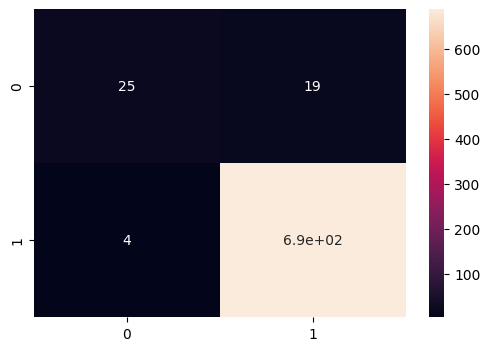

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.rcParams["figure.figsize"] = (6,4)
ax = plt.axes()
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap="rocket")
plt.show()

In [48]:
df['binaryClass'].value_counts()

binaryClass
1    3387
0     291
Name: count, dtype: int64

In [49]:
original_df=df.copy()

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_trf = sc.fit_transform(X_train)
X_test_trf = sc.fit_transform(X_test)

In [51]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [52]:
model=Sequential()
model.add(Dense(27,activation='sigmoid',input_dim=27))
model.add(Dense(1,activation='sigmoid'))


In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 1)                 28        
                                                                 
Total params: 784
Trainable params: 784
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model.fit(X_train_trf,y_train,epochs=100)

Epoch 1/100
92/92 [==============================] - 1s 2ms/step - loss: 0.7117 - accuracy: 0.5408
Epoch 2/100
92/92 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.9052
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.9215
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.9222
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9249
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9279
Epoch 7/100
92/92 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9307
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 0.1933 - accuracy: 0.9337
Epoch 9/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9358
Epoch 10/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.9368
Epoch 11/

In [56]:
model.layers[0].get_weights()

[array([[ 4.72127013e-02,  4.56763431e-02,  4.23292279e-01,
         -7.95807168e-02,  1.74899567e-02, -7.71430880e-02,
          1.97473243e-01,  1.10723883e-01,  2.29075223e-01,
         -1.16916880e-01, -5.31139225e-03,  5.18981554e-02,
         -2.90955743e-03,  9.94925015e-03,  3.05089504e-01,
          4.89946604e-02, -1.33992853e-02, -6.40569851e-02,
          1.09545007e-01,  1.46167306e-02, -9.28597152e-02,
         -8.16262588e-02,  9.03184935e-02, -1.69054046e-01,
         -4.43901122e-02, -5.12874499e-02, -8.67819861e-02],
        [-8.84161070e-02,  4.50258888e-02, -5.50017953e-02,
          3.96567360e-02, -9.68649909e-02, -7.39603192e-02,
         -1.80173993e-01,  2.72273242e-01,  6.81957975e-02,
          1.58765972e-01, -1.17244303e-01,  1.05275862e-01,
          1.14825994e-01, -4.49597277e-03,  5.73932230e-02,
         -8.56789947e-02, -5.05062751e-02, -2.40347926e-02,
         -1.47497535e-01, -2.66191572e-01,  1.28967717e-01,
          6.44095913e-02,  7.05946386e-

In [57]:
y_pred_mlp=model.predict(X_test_trf)

23/23 [==============================] - 0s 1ms/step


In [58]:
y_pred_mlp

array([[9.9967080e-01],
       [9.9922508e-01],
       [2.7643751e-02],
       [9.8609304e-01],
       [5.9814638e-01],
       [9.9551183e-01],
       [9.9974024e-01],
       [9.9851626e-01],
       [9.9732602e-01],
       [9.9999976e-01],
       [9.9970067e-01],
       [9.9093765e-01],
       [9.9999923e-01],
       [9.9835879e-01],
       [1.0000000e+00],
       [9.8567975e-01],
       [9.9846441e-01],
       [1.7400220e-02],
       [9.9933976e-01],
       [9.9956053e-01],
       [9.9915665e-01],
       [9.9965519e-01],
       [9.9972755e-01],
       [9.9999958e-01],
       [9.9988204e-01],
       [9.9787933e-01],
       [9.9291873e-01],
       [9.9999982e-01],
       [9.9944973e-01],
       [9.9901092e-01],
       [7.2170091e-01],
       [3.3014271e-01],
       [9.9618405e-01],
       [9.9982655e-01],
       [9.8044652e-01],
       [9.9993467e-01],
       [3.3098999e-02],
       [9.9732518e-01],
       [9.1625130e-01],
       [9.9852073e-01],
       [9.9650127e-01],
       [1.000000

In [59]:
y_pred_mlp_final=np.where(y_pred_mlp>0.5,1,0)

In [60]:
y_pred_mlp_final

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [61]:
accuracy_mlp=accuracy_score(y_test,y_pred_mlp_final)

In [62]:
accuracy_mlp

0.9904891304347826

In [63]:
#we see that using neural networks we are very easily able to achieve an accuracy of 99.1% which is way higher than our original baseline model using machine learning 

In [64]:
# we can still improve our neural network by
#1.Increasing epochs
#2.Using a different activation function like relu
#3.Increase the number of hidden layers
#4.but we have to be carefull in our experimentation in order to avoid overfitting

In [77]:
model_new=Sequential()
model_new.add(Dense(27,activation='relu',input_dim=27))
model_new.add(Dense(27,activation='relu'))
model_new.add(Dense(1,activation='sigmoid'))


In [78]:
model_new.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [80]:
history = model_new.fit(X_train_trf,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
74/74 [==============================] - 1s 5ms/step - loss: 0.4232 - accuracy: 0.8929 - val_loss: 0.2691 - val_accuracy: 0.9117
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9188 - val_loss: 0.2117 - val_accuracy: 0.9202
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.9333 - val_loss: 0.1887 - val_accuracy: 0.9321
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9448 - val_loss: 0.1734 - val_accuracy: 0.9406
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9477 - val_loss: 0.1606 - val_accuracy: 0.9457
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9499 - val_loss: 0.1484 - val_accuracy: 0.9474
Epoch 7/100
74/74 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9528 - val_loss: 0.1390 - val_accuracy: 0.9508
Epoch 8/100
7

In [81]:
y_log = model_new.predict(X_test_trf)


23/23 [==============================] - 0s 1ms/step


In [82]:
y_pred=np.where(y_log>0.5,1,0)

In [83]:
accuracy_score(y_test,y_pred)

0.9864130434782609

In [76]:
y_log

array([[0.46492964],
       [0.5051573 ],
       [0.41533276],
       [0.467564  ],
       [0.4753913 ],
       [0.49250725],
       [0.47729564],
       [0.46097016],
       [0.4654276 ],
       [0.23198166],
       [0.49283975],
       [0.36181524],
       [0.376775  ],
       [0.48867372],
       [0.44902566],
       [0.4292151 ],
       [0.52017957],
       [0.46566862],
       [0.49148586],
       [0.4764642 ],
       [0.47893152],
       [0.5001322 ],
       [0.4672418 ],
       [0.30120015],
       [0.51649827],
       [0.39998755],
       [0.3611383 ],
       [0.39023796],
       [0.40332508],
       [0.4630571 ],
       [0.38726288],
       [0.46262768],
       [0.49238342],
       [0.5818715 ],
       [0.49761885],
       [0.38057446],
       [0.518644  ],
       [0.38098952],
       [0.38036355],
       [0.5196862 ],
       [0.5046739 ],
       [0.46668154],
       [0.5389324 ],
       [0.48067212],
       [0.5007583 ],
       [0.47085255],
       [0.50886077],
       [0.481